In [2]:
%reload_ext autoreload
%autoreload 2

import os
from pathlib import Path

print(Path().cwd())
os.chdir(Path(os.getcwd()).parent)
print(Path().cwd())

/Users/wuyuanshan/Desktop/Github/QuantUS-Plugins-CEUS/CLI-Demos
/Users/wuyuanshan/Desktop/Github/QuantUS-Plugins-CEUS


In [3]:
from src.image_loading.options import get_scan_loaders

print("Available scan loaders:", list(get_scan_loaders().keys()))

Available scan loaders: ['avi', 'nifti', 'custom_dicom', 'mp4']


In [9]:
scan_type = 'avi'

# Takes the DICOM file as input for contrast enhanced ultrasound (CEUS) scans
CEUS_scan_path = '/Volumes/T5 EVO/Helenie White Data/2025-11-07-16-34-47_2025-11-07-15-48-58_1.avi'
scan_loader_kwargs = {
}

In [10]:
from src.entrypoints import scan_loading_step

image_data = scan_loading_step(scan_type, CEUS_scan_path, **scan_loader_kwargs)

In [7]:
image_data.pixel_data.shape

(311, 606, 912, 3)

(612, 558, 1032, 3)


Text(0, 0.5, 'Depth (Y)')

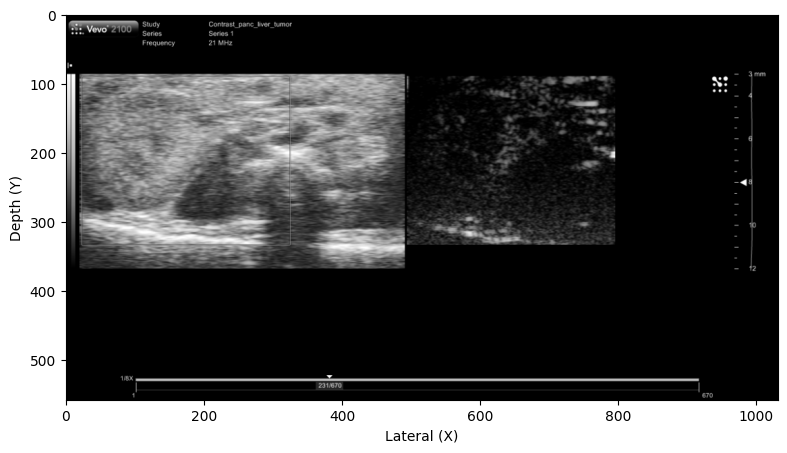

In [15]:
import matplotlib.pyplot as plt
import numpy as np
print(image_data.pixel_data.shape)


# Define slice positions
frame = 210         # time point

# Create figure with 3 subplots
fig, ax = plt.subplots( figsize=(15, 5))

# Axial view (looking down the elevation/z axis)
ax.imshow(image_data.pixel_data[frame, :, :, 0], cmap='gray')
ax.set_xlabel('Lateral (X)')
ax.set_ylabel('Depth (Y)')

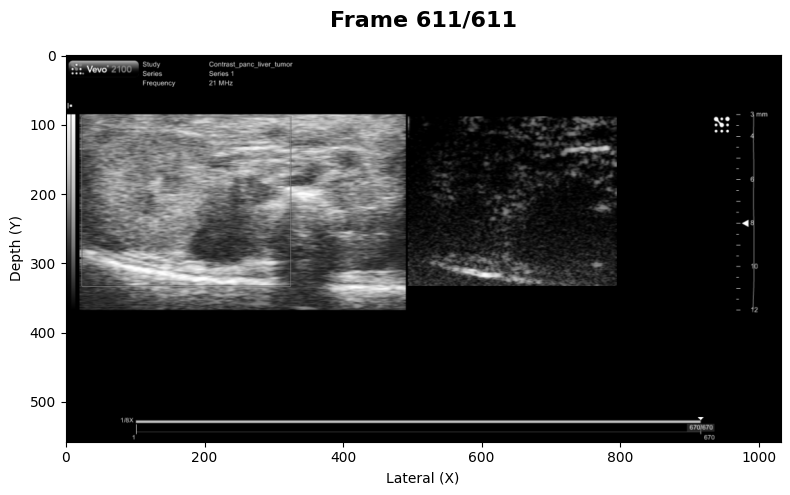

Frame 611/611


In [18]:
from IPython.display import clear_output
import time
start_frame = 0
end_frame = image_data.pixel_data.shape[0]

for frame in range(start_frame, end_frame):
    # Clear previous output and display current frame
    clear_output(wait=True)
    
    fig, ax = plt.subplots( figsize=(15, 5))

    # Axial view (looking down the elevation/z axis)
    ax.imshow(image_data.pixel_data[frame, :, :, 0], cmap='gray')
    ax.set_xlabel('Lateral (X)')
    ax.set_ylabel('Depth (Y)')
    
    # Add overall frame counter
    fig.suptitle(f'Frame {frame}/{end_frame-1}', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print progress
    print(f"Frame {frame}/{end_frame-1}")
    
    # Pause
    time.sleep(0.1)
    
    # Close figure to save memory
    plt.close(fig)